In [388]:
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tslearn.clustering import KShape
from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.metrics import confusion_matrix
from tslearn.clustering import TimeSeriesKMeans, silhouette_score


In [389]:
year_file_path = "YOUR_PATH\\data\\year_processed_features\\2016\\car_count"
files = listdir(year_file_path)

In [390]:
filename_stub = "CarCount_interval5_greyscale_lam_610_"
filtered = filter(lambda path: filename_stub in path, files)

In [391]:
days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]

In [392]:
datasets = []

for path in filtered:
    if (path[-7:-4] in days):
        datasets.append(path)

In [393]:
def create_data_matrix(file_path):
    img_data = Image.open(file_path)
    day_data = np.array(bytearray(img_data.tobytes()), dtype="uint8")
    return np.transpose(day_data.reshape(288, 48))    

In [394]:
day_data = create_data_matrix(f"{year_file_path}\\{datasets[0]}")

for i in range(1, 7):
    day_path = f"{year_file_path}\\{datasets[i]}"
    day_data = np.concatenate((day_data, create_data_matrix(day_path)))

In [395]:
def create_bar_chart(preds):
    counts = np.zeros(len(np.unique(preds)), dtype="uint8")
    for i in preds:
        counts[i] += 1
    _ = plt.bar(np.arange(len(counts)), counts)
    plt.show()

In [396]:
def cluster_and_visualise(timeseries_data, cluster_count):
    metric = "dtw"
    
    X_train = TimeSeriesScalerMeanVariance().fit_transform(data)
    sz = X_train.shape[1]

    # kShape clustering
    model = TimeSeriesKMeans(n_clusters=cluster_count, metric=metric,
                        n_jobs=-1)
    y_pred = model.fit_predict(X_train)
    
    plt.figure()
    for yi in range(cluster_count):
        plt.subplot(4, 2, 1 + yi)
        
        plt.plot(model.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz)
        plt.ylim(-4, 4)
        plt.title("Cluster %d" % (yi + 1))

    plt.tight_layout()
    plt.show()
    
    create_bar_chart(y_pred)
    
    visualise_predictions(y_pred)
    
    return y_pred
    
def visualise_predictions(preds):
    day_labels = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
    preds_in_class = {}
    for pred_class in np.unique(preds):
        preds_in_class[pred_class] = []
    
    for i in range(len(preds)):
        pred = preds[i]
        preds_in_class[pred].append(i%7)
        
    plt.figure()
    for key in preds_in_class.keys():
        plt.subplot(4, 2, 1 + key)
        data = count_entries(preds_in_class[key])
        plt.bar(np.arange(len(data)) + 0.5, data)
        plt.xlim(0, 7)
        
    plt.tight_layout()
    plt.show()
        
def count_entries(data):
    counts = np.zeros(7, dtype="uint8")
    for d in data:
        counts[d] += 1
        
    return counts

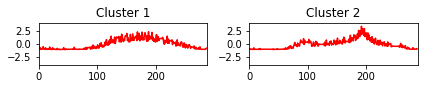

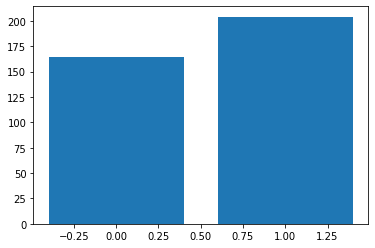

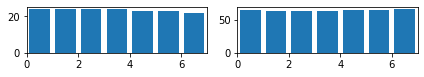

In [397]:
y_preds = cluster_and_visualise(data, 2)

In [340]:
day_data.shape

(672, 288)

In [384]:
week_data = []

for day in range(48):
    week = []
    for i in range(7):
        week = np.concatenate([week, day_data[i*48]])
    week_data.append(week)

week_data = np.array(week_data)

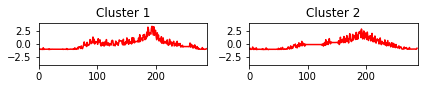

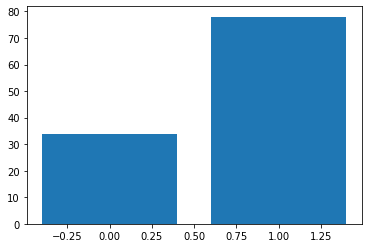

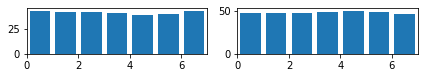

In [387]:
y_preds = cluster_and_visualise(data, 2)